# Predicting Engineering Graduate Salary

**Pranay Garg  
0801CS171056  
CSE 4th year  
Data Science Project 1**

## Preamble

The main intent of this project is to understand the life cycle of data science and follow all the steps to build a machine learning model to predict the salary of an engineering graduate based on various factors given in the dataset with maximum accuracy.

## Data Understanding

### 1. Data Source / URL  

   [Engineering Graduate Salary Dataset](https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction)  
   [Dataset Documentation](http://research.aspiringminds.com/wp-content/uploads/2016/05/ameo-2015-final-with-appendix.pdf)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/media/pranay/PG/PRANAY/data_science_gupta_sir/project1')

file_path = '/media/pranay/PG/PRANAY/data_science_gupta_sir/project1/Engineering_graduate_salary.csv'
salary_data_org = pd.read_csv(file_path, na_values = [-1])

print('Setup Complete')

Setup Complete


In [2]:
salary_data_org['ID'] = salary_data_org.index
salary_data_org = salary_data_org.set_index('ID')
salary_data = salary_data_org.copy()
salary_data.head()

salary_datao = salary_data_org.copy()

### 2. Data Physical Characteristics

 - Table consists of 2998 rows and 33 columns

In [3]:
salary_data.shape

(2998, 33)

- Info method gives us information about the data types and count of non-null values of the columns
- But most of the missing values are intentional i.e they are not missing due to some error. for ex CivilEngg column values are present for only those students who took the test for Civil Engineering and for others it is marked as -1, which is being treated as -1.

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2997
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   DOB                    2998 non-null   object 
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   object 
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   object 
 7   CollegeID              2998 non-null   int64  
 8   CollegeTier            2998 non-null   int64  
 9   Degree                 2998 non-null   object 
 10  Specialization         2998 non-null   object 
 11  collegeGPA             2998 non-null   float64
 12  CollegeCityID          2998 non-null   int64  
 13  CollegeCityTier        2998 non-null   int64  
 14  CollegeState           2998 non-null   object 
 15  Grad

- Describe method tells us about the various properties of numerical columns such as count, mean, standard-deviation...etc
- We can get an idea about the quality of data using describe method, for ex if mean and median are far away or standard deviation is too large can indicate about the skewness of the data

In [5]:
pd.set_option('display.float_format', lambda x : '%.3f' % x)
pd.set_option('display.max_columns',100)
salary_data.describe()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2819.000,2348.000,865.000,700.000,187.000,122.000,274.000,26.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,77.666,2008.081,74.341,5210.211,1.925,71.510,5210.211,0.296,2011.940,501.066,500.432,514.138,0.604,449.554,335.983,406.501,402.027,423.336,349.880,338.808,-0.039,0.126,-0.009,-0.146,-0.141,305174.783
std,10.003,1.632,11.120,4776.610,0.264,8.122,4776.610,0.457,36.781,105.305,87.300,122.195,0.273,96.876,80.733,89.729,85.555,96.232,73.794,74.635,1.025,0.956,0.963,1.013,1.007,212331.194
min,43.000,1998.000,40.000,2.000,1.000,6.630,2.000,0.000,0.000,180.000,195.000,120.000,0.008,105.000,133.000,192.000,180.000,206.000,164.000,166.000,-3.893,-5.782,-4.601,-2.643,-7.376,35000.000
25%,71.140,2007.000,66.000,526.250,2.000,66.530,526.250,0.000,2012.000,425.000,441.250,430.000,0.376,385.000,292.000,346.000,346.000,356.000,287.500,292.000,-0.649,-0.435,-0.605,-0.868,-0.669,180000.000
50%,78.965,2008.000,74.000,4027.500,2.000,71.800,4027.500,0.000,2013.000,500.000,505.000,515.000,0.636,445.000,333.000,407.000,393.000,420.000,340.000,331.000,0.046,0.212,0.091,-0.173,-0.094,300000.000
75%,85.600,2009.000,82.600,8822.250,2.000,76.300,8822.250,1.000,2014.000,570.000,565.000,595.000,0.842,515.000,388.000,469.000,446.000,473.000,393.000,374.000,0.703,0.813,0.672,0.526,0.502,370000.000
max,97.760,2012.000,98.700,18409.000,2.000,99.930,18409.000,1.000,2017.000,875.000,795.000,900.000,1.000,804.000,612.000,715.000,623.000,660.000,548.000,500.000,1.995,1.905,2.162,3.353,1.630,4000000.000


- Dropping unwanted columns

In [6]:
remove_col = ['CollegeID','CollegeCityID','CollegeCityTier']
salary_data = salary_data.drop(columns = remove_col,axis = 1)
salary_datao = salary_datao.drop(columns = remove_col,axis = 1)
salary_data.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2819.000,2348.000,865.000,700.000,187.000,122.000,274.000,26.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,77.666,2008.081,74.341,1.925,71.510,2011.940,501.066,500.432,514.138,0.604,449.554,335.983,406.501,402.027,423.336,349.880,338.808,-0.039,0.126,-0.009,-0.146,-0.141,305174.783
std,10.003,1.632,11.120,0.264,8.122,36.781,105.305,87.300,122.195,0.273,96.876,80.733,89.729,85.555,96.232,73.794,74.635,1.025,0.956,0.963,1.013,1.007,212331.194
min,43.000,1998.000,40.000,1.000,6.630,0.000,180.000,195.000,120.000,0.008,105.000,133.000,192.000,180.000,206.000,164.000,166.000,-3.893,-5.782,-4.601,-2.643,-7.376,35000.000
25%,71.140,2007.000,66.000,2.000,66.530,2012.000,425.000,441.250,430.000,0.376,385.000,292.000,346.000,346.000,356.000,287.500,292.000,-0.649,-0.435,-0.605,-0.868,-0.669,180000.000
50%,78.965,2008.000,74.000,2.000,71.800,2013.000,500.000,505.000,515.000,0.636,445.000,333.000,407.000,393.000,420.000,340.000,331.000,0.046,0.212,0.091,-0.173,-0.094,300000.000
75%,85.600,2009.000,82.600,2.000,76.300,2014.000,570.000,565.000,595.000,0.842,515.000,388.000,469.000,446.000,473.000,393.000,374.000,0.703,0.813,0.672,0.526,0.502,370000.000
max,97.760,2012.000,98.700,2.000,99.930,2017.000,875.000,795.000,900.000,1.000,804.000,612.000,715.000,623.000,660.000,548.000,500.000,1.995,1.905,2.162,3.353,1.630,4000000.000


In [7]:
salary_data.drop_duplicates(keep = 'first', inplace = True)
salary_datao.drop_duplicates(keep = 'first', inplace = True)

- New Shape of data

In [8]:
salary_data.shape

(2998, 30)

- Here I have calculated the % of missing values in dataset which is around 16%

In [9]:
miss_count = salary_data.isnull().sum().sum()
total = np.product(salary_data.shape)
print("missing values",miss_count*100/total,'%')

missing values 18.504558594618636 %


In [10]:
salary_data.isnull().sum()

Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    179
ComputerProgramming       650
ElectronicsAndSemicon    2133
ComputerScience          2298
MechanicalEngg           2811
ElectricalEngg           2876
TelecomEngg              2724
CivilEngg                2972
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Salary                      0
dtype: int64

### 3. Data attributes details

- According to documentation, columns like English, Quant has range of values between [100,900] while Domain represents the percentile score of the students i.e (0,1) and columns representing Big 5 personality traits are sampled from a distribution with mean 0 and standard deviation 1
- So, to bring the data on same scale to fit into the model it would be better to standardize the data using techniques like Z-score transformation, which is done in the later stage of the project
- Columns like Gender and degree contain categorical data which does not require any additional cleaning.

In [11]:
salary_data.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2819.000,2348.000,865.000,700.000,187.000,122.000,274.000,26.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,77.666,2008.081,74.341,1.925,71.510,2011.940,501.066,500.432,514.138,0.604,449.554,335.983,406.501,402.027,423.336,349.880,338.808,-0.039,0.126,-0.009,-0.146,-0.141,305174.783
std,10.003,1.632,11.120,0.264,8.122,36.781,105.305,87.300,122.195,0.273,96.876,80.733,89.729,85.555,96.232,73.794,74.635,1.025,0.956,0.963,1.013,1.007,212331.194
min,43.000,1998.000,40.000,1.000,6.630,0.000,180.000,195.000,120.000,0.008,105.000,133.000,192.000,180.000,206.000,164.000,166.000,-3.893,-5.782,-4.601,-2.643,-7.376,35000.000
25%,71.140,2007.000,66.000,2.000,66.530,2012.000,425.000,441.250,430.000,0.376,385.000,292.000,346.000,346.000,356.000,287.500,292.000,-0.649,-0.435,-0.605,-0.868,-0.669,180000.000
50%,78.965,2008.000,74.000,2.000,71.800,2013.000,500.000,505.000,515.000,0.636,445.000,333.000,407.000,393.000,420.000,340.000,331.000,0.046,0.212,0.091,-0.173,-0.094,300000.000
75%,85.600,2009.000,82.600,2.000,76.300,2014.000,570.000,565.000,595.000,0.842,515.000,388.000,469.000,446.000,473.000,393.000,374.000,0.703,0.813,0.672,0.526,0.502,370000.000
max,97.760,2012.000,98.700,2.000,99.930,2017.000,875.000,795.000,900.000,1.000,804.000,612.000,715.000,623.000,660.000,548.000,500.000,1.995,1.905,2.162,3.353,1.630,4000000.000


In [12]:
salary_data.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,f,1990-10-22,87.800,cbse,2009,84.000,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.820,Delhi,2013,650,665,810,0.694,485.000,366.000,nan,nan,nan,nan,nan,-0.159,0.379,1.240,0.146,0.289,445000
1,m,1990-05-15,57.000,cbse,2010,64.500,cbse,2,B.Tech/B.E.,computer science & engineering,65.000,Uttar Pradesh,2014,440,435,210,0.342,365.000,nan,nan,nan,nan,nan,nan,1.134,0.046,1.240,0.526,-0.286,110000
2,m,1989-08-21,77.330,"maharashtra state board,pune",2007,85.170,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.940,Maharashtra,2011,485,475,505,0.825,nan,400.000,nan,nan,nan,260.000,nan,0.510,-0.123,1.543,-0.290,-0.287,255000
3,m,1991-05-04,84.300,cbse,2009,86.000,cbse,1,B.Tech/B.E.,computer science & engineering,80.400,Delhi,2013,675,620,635,0.990,655.000,nan,nan,nan,nan,nan,nan,-0.446,0.212,0.317,0.273,0.480,420000
4,f,1990-10-30,82.000,cbse,2008,75.000,cbse,2,B.Tech/B.E.,biotechnology,64.300,Tamil Nadu,2012,575,495,365,0.278,315.000,nan,nan,nan,nan,nan,nan,-1.499,-0.747,-1.070,0.062,0.186,200000


## Data Preparation

- Currently Date of Birth is being treated as object data type which should be of datetime type for future analysis

In [13]:
salary_data['DOB'] = pd.to_datetime(salary_data['DOB'], format = '%Y-%m-%d')
salary_data['DOB'].head()

salary_datao['DOB'] = pd.to_datetime(salary_datao['DOB'], format = '%Y-%m-%d')

In [14]:
salary_data['Gender'].unique()

array(['f', 'm'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

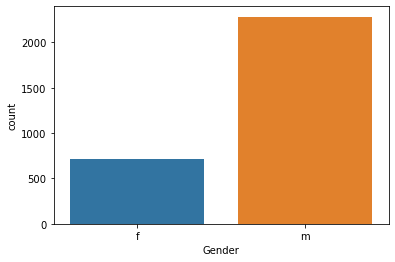

In [15]:
sns.countplot(x = salary_data['Gender'])

- Since Gender is a categorical variable and is important feature in predicting salary. It is important to convert into numerical values to assign weights.
- Therefore i am splitting it into 2 dummy columns m and f. m will be 1 for male students and 0 otherwise and similarly f wll be 1 for female students and 0 for male.

In [16]:
temp = pd.get_dummies(salary_data['Gender'])
salary_data = salary_data.join(temp)
salary_datao = salary_datao.join(temp)
salary_data
# temp

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,f,m
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,f,1990-10-22,87.800,cbse,2009,84.000,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.820,Delhi,2013,650,665,810,0.694,485.000,366.000,nan,nan,nan,nan,nan,-0.159,0.379,1.240,0.146,0.289,445000,1,0
1,m,1990-05-15,57.000,cbse,2010,64.500,cbse,2,B.Tech/B.E.,computer science & engineering,65.000,Uttar Pradesh,2014,440,435,210,0.342,365.000,nan,nan,nan,nan,nan,nan,1.134,0.046,1.240,0.526,-0.286,110000,0,1
2,m,1989-08-21,77.330,"maharashtra state board,pune",2007,85.170,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.940,Maharashtra,2011,485,475,505,0.825,nan,400.000,nan,nan,nan,260.000,nan,0.510,-0.123,1.543,-0.290,-0.287,255000,0,1
3,m,1991-05-04,84.300,cbse,2009,86.000,cbse,1,B.Tech/B.E.,computer science & engineering,80.400,Delhi,2013,675,620,635,0.990,655.000,nan,nan,nan,nan,nan,nan,-0.446,0.212,0.317,0.273,0.480,420000,0,1
4,f,1990-10-30,82.000,cbse,2008,75.000,cbse,2,B.Tech/B.E.,biotechnology,64.300,Tamil Nadu,2012,575,495,365,0.278,315.000,nan,nan,nan,nan,nan,nan,-1.499,-0.747,-1.070,0.062,0.186,200000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,1989-04-17,75.000,0,2005,73.000,0,2,B.Tech/B.E.,electronics and communication engineering,70.000,Tamil Nadu,2010,505,485,445,0.538,245.000,333.000,nan,nan,nan,nan,nan,-1.190,0.969,-1.070,1.355,0.028,120000,1,0
2994,f,1991-07-22,84.000,state board,2008,77.000,state board,2,B.Tech/B.E.,information technology,75.200,Tamil Nadu,2012,345,585,395,0.190,315.000,nan,nan,nan,nan,nan,nan,-0.108,0.033,-0.489,-0.290,0.502,120000,1,0
2995,m,1988-11-24,91.400,bsemp,2006,65.560,bsemp,2,B.Tech/B.E.,information technology,73.190,Madhya Pradesh,2011,385,425,485,0.600,435.000,nan,nan,nan,nan,nan,nan,-0.881,0.189,-0.344,0.062,0.660,385000,0,1


- As we can see from describe mean and median are close but standard deviation for Salary is too high, which accounts for the skewness of the data. Also the min annual CTC of 35000 does'nt makes sense which means that this column require cleaning
- And if we directly plot the box plot there are lot of outliers and hardly any box is visible. Therefore we have to change the working range to [70000,650000] which accounts for 109 less rows.

In [17]:
print(salary_data['Salary'].value_counts().sort_index())
print(salary_data['Salary'].describe())
temp = salary_data[(salary_data['Salary']>=70000) & (salary_data['Salary']<=650000)]
print(salary_data.shape[0]-temp.shape[0])

35000      3
40000      2
45000      3
50000      4
55000      1
          ..
2300000    1
2500000    1
2600000    1
3500000    1
4000000    2
Name: Salary, Length: 165, dtype: int64
count      2998.000
mean     305174.783
std      212331.194
min       35000.000
25%      180000.000
50%      300000.000
75%      370000.000
max     4000000.000
Name: Salary, dtype: float64
109


/home/pranay/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

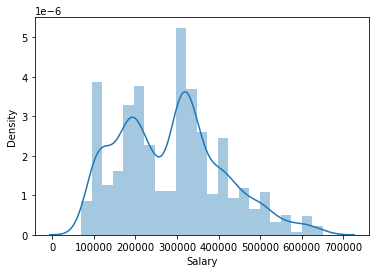

In [18]:
sns.distplot(temp['Salary'])

<AxesSubplot:ylabel='Salary'>

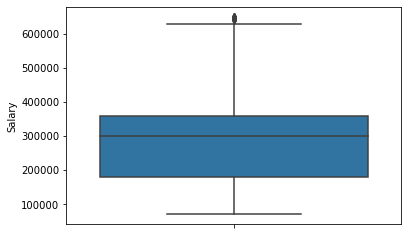

In [19]:
sns.boxplot(y = temp['Salary'])

In [20]:
salary_data = salary_data[(salary_data['Salary']>=70000) & (salary_data['Salary']<=650000)]
print(salary_data.shape)
print(salary_data['Salary'].describe())

(2889, 32)
count     2889.000
mean    285871.928
std     124777.343
min      70000.000
25%     180000.000
50%     300000.000
75%     360000.000
max     650000.000
Name: Salary, dtype: float64


- Below Box plot shows relationship between Gender and salary. As we can see, the max and min salary is greater for male than female. Though average salary is almost same for both male and female.

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

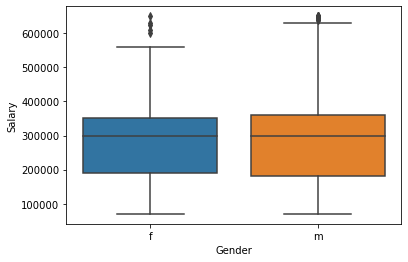

In [21]:
sns.boxplot(x = salary_data['Gender'], y = salary_data['Salary'])

- As we can notice from the below box plot and description of the column, there is not much difference between mean and median value (77.63,78.80) and standard deviation is also normal (9.99)
- But according to Box plot there are some outliers whose count can be around 10 values. We can try to remove these values at the later stage to improve accuracy

61.690     1
61.730     1
83.040     1
79.330     1
88.700     1
          ..
72.000    51
87.000    51
80.000    51
76.000    52
78.000    56
Name: 10percentage, Length: 723, dtype: int64
count   2889.000
mean      77.638
std        9.993
min       43.000
25%       71.100
50%       78.800
75%       85.600
max       97.120
Name: 10percentage, dtype: float64
possible outliers 17


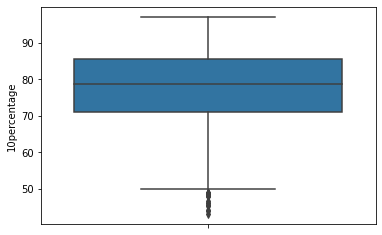

In [22]:
df = salary_data['10percentage'].value_counts().sort_values()
print(df)
print(salary_data['10percentage'].describe())

sns.boxplot(y = salary_data['10percentage'])
print('possible outliers',(salary_data['10percentage'] < 50).sum())

- As we can notice from below scatter plot that salary generally increases a bit with 10th percentage.

<AxesSubplot:xlabel='10percentage', ylabel='Salary'>

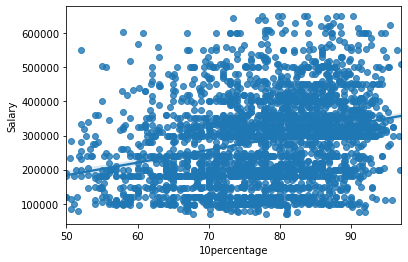

In [23]:
salary_data = salary_data[salary_data['10percentage']>=50]

sns.regplot(x = salary_data['10percentage'], y = salary_data['Salary'], fit_reg = True, scatter = True)

/home/pranay/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='10percentage', ylabel='Density'>

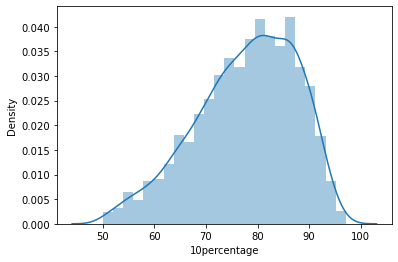

In [24]:
sns.distplot(salary_data['10percentage'])

- As we can notice from the box plot and description of the column, there is not much difference between mean and median value (74.34,74.00) and standard deviation is also normal (11.12)
- But according to Box plot there are some outliers. We can try to remove these values at the later stage to improve accuracy

count   2872.000
mean      74.384
std       11.078
min       40.000
25%       66.000
50%       74.000
75%       82.600
max       98.700
Name: 12percentage, dtype: float64
1


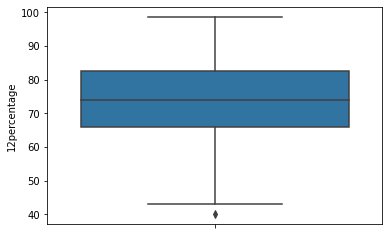

In [25]:
df = salary_data['12percentage'].value_counts().sort_values()
df
print(salary_data['12percentage'].describe())

sns.boxplot(y = salary_data['12percentage'])
print((salary_data['12percentage'] < 41).sum())

<AxesSubplot:xlabel='12percentage', ylabel='Salary'>

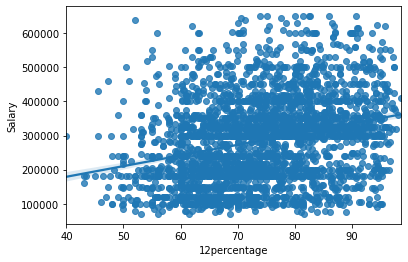

In [26]:
sns.regplot(x = salary_data['12percentage'], y = salary_data['Salary'],fit_reg = True, scatter = True)

/home/pranay/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12percentage', ylabel='Density'>

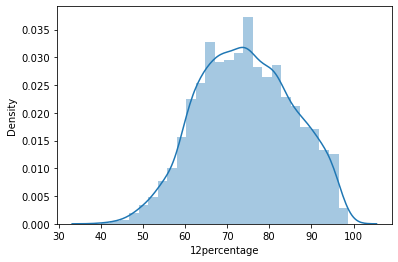

In [27]:
sns.distplot(salary_data['12percentage'])

In [28]:
df = salary_data['12graduation'].unique()
salary_data['12graduation'] = pd.to_datetime(salary_data['12graduation'], format = '%Y')
salary_datao['12graduation'] = pd.to_datetime(salary_datao['12graduation'], format = '%Y')
salary_data['12graduation'].dtype
salary_data['12graduation']
# df.sort()
# df

ID
0      2009-01-01
1      2010-01-01
2      2007-01-01
3      2009-01-01
4      2008-01-01
          ...    
2993   2005-01-01
2994   2008-01-01
2995   2006-01-01
2996   2006-01-01
2997   2009-01-01
Name: 12graduation, Length: 2872, dtype: datetime64[ns]

In [29]:
df = salary_data['CollegeTier'].unique()
# salary_data['CollegeTier'].dtype
salary_data['CollegeTier'].value_counts()
print(df)

[1 2]


<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

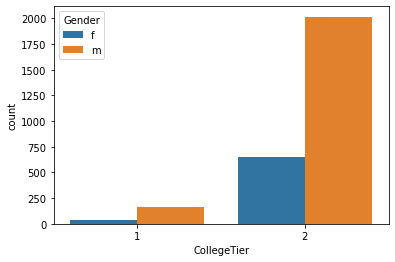

In [30]:
sns.countplot(x = 'CollegeTier', data = salary_data, hue = 'Gender')

- It is clearly observable from below box plot that Tier-1 Colleges are paid more than Tier-2 Colleges

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

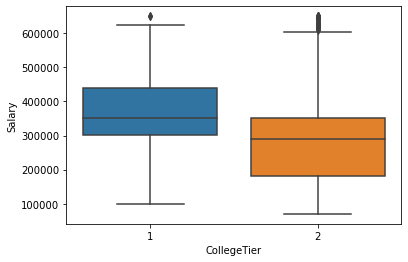

In [31]:
sns.boxplot(x = salary_data['CollegeTier'], y = salary_data['Salary'])

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

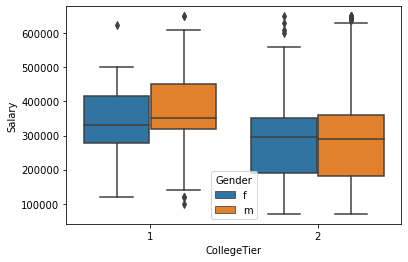

In [32]:
sns.boxplot(x = salary_data['CollegeTier'], y = salary_data['Salary'], hue = salary_data['Gender'])

- Since there is only one row corresponding to M.Sc. we can remove that row to reduce the inconsistencies

In [33]:
df = salary_data['Degree'].unique()
df.sort()
salary_data['Degree'].value_counts()

salary_data = salary_data[salary_data['Degree']!='M.Sc. (Tech.)']
salary_datao = salary_datao[salary_datao['Degree']!='M.Sc. (Tech.)']
salary_data['Degree'].value_counts()

B.Tech/B.E.     2651
MCA              184
M.Tech./M.E.      36
Name: Degree, dtype: int64

<AxesSubplot:xlabel='Degree', ylabel='count'>

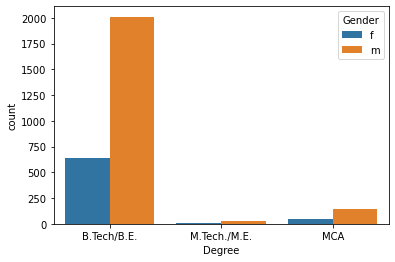

In [34]:
sns.countplot(x = salary_data['Degree'], hue = salary_data['Gender'])

- It is evident from the below plot that MCA is the least paying branch while M.tech is the higly paid branch but the minimum salary of B.tech is better than others.

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

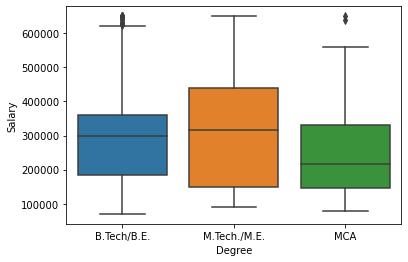

In [35]:
sns.boxplot(x = salary_data['Degree'], y = salary_data['Salary'])

-  College GPA is supposed to be on the scale of 0-10 but some values are represented in the form of %
- After transforming the GPA, mean and median are quite close and standard deviation is also small which accounts for less/no skewed data.

In [36]:
def map_gpa(row) : 
    if row.collegeGPA > 10 :
        row.collegeGPA = row.collegeGPA/10
    return row

salary_data = salary_data.apply(map_gpa, axis = 1)
salary_datao = salary_datao.apply(map_gpa, axis = 1)

salary_data['collegeGPA'].value_counts().sort_index()
print(salary_data['collegeGPA'].describe())
print(salary_data['collegeGPA'].isnull().sum())

count   2871.000
mean       7.164
std        0.727
min        4.907
25%        6.660
50%        7.180
75%        7.620
max        9.993
Name: collegeGPA, dtype: float64
0


<AxesSubplot:ylabel='collegeGPA'>

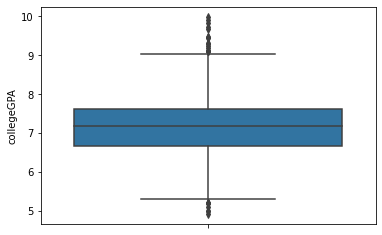

In [37]:
sns.boxplot(y = salary_data['collegeGPA'])

- Values less than 5 and greater than 9  are outliers according to box plot.

30


<AxesSubplot:ylabel='collegeGPA'>

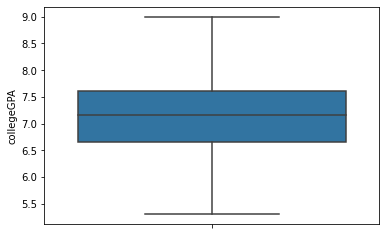

In [38]:
print((salary_data['collegeGPA']<5.3).sum() + (salary_data['collegeGPA']>9.0).sum())
salary_data = salary_data[(salary_data['collegeGPA']>=5.3) & (salary_data['collegeGPA']<=9.0)]
sns.boxplot(y = salary_data['collegeGPA'])

# print(abs(salary_data.corr()['Salary']))

- As per the scatter plot there is not visible relationship between collegeGPA and Salary which is bit of a surprise

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

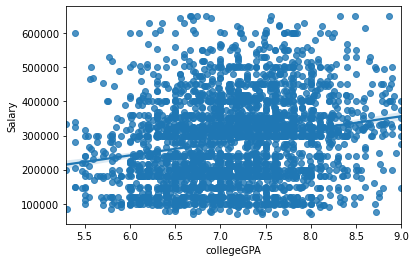

In [39]:
sns.regplot(x = 'collegeGPA', y = 'Salary', scatter = True, fit_reg = True, data = salary_data)

/home/pranay/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

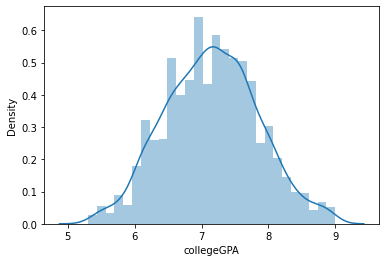

In [40]:
sns.distplot(salary_data['collegeGPA'])

In [41]:
df = salary_data['CollegeState'].value_counts().sort_values()
df

Goa                    1
Meghalaya              1
Sikkim                 2
Assam                  4
Jammu and Kashmir      5
Union Territory        5
Bihar                  7
Himachal Pradesh      13
Gujarat               15
Jharkhand             16
Chhattisgarh          17
Kerala                23
Uttarakhand           76
Delhi                115
Rajasthan            121
Orissa               125
Punjab               126
Haryana              132
West Bengal          137
Madhya Pradesh       138
Andhra Pradesh       168
Maharashtra          175
Telangana            238
Tamil Nadu           254
Karnataka            264
Uttar Pradesh        663
Name: CollegeState, dtype: int64

<AxesSubplot:xlabel='CollegeState', ylabel='count'>

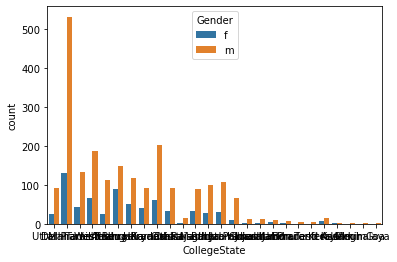

In [42]:
sns.countplot(x = 'CollegeState', data = salary_data, hue = 'Gender')

<AxesSubplot:xlabel='CollegeState', ylabel='Salary'>

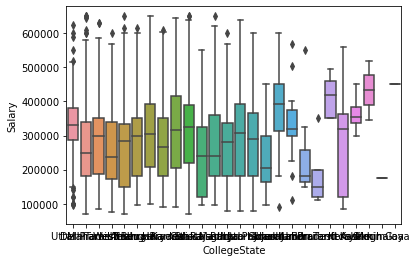

In [43]:
sns.boxplot(x = salary_data['CollegeState'], y = salary_data['Salary'])

In [44]:
# df = salary_data['GraduationYear'].unique()
# df.sort()
# df
# 1 row with graduation year as 0
max_occ_val = salary_data['GraduationYear'].mode()[0]
salary_data['GraduationYear'] = salary_data['GraduationYear'].replace(0,max_occ_val)
salary_data['GraduationYear'] = pd.to_datetime(salary_data['GraduationYear'], format = '%Y')

salary_datao['GraduationYear'] = salary_datao['GraduationYear'].replace(0,max_occ_val)
salary_datao['GraduationYear'] = pd.to_datetime(salary_datao['GraduationYear'], format = '%Y')

# salary_data['GraduationYear'].unique()
salary_data['GraduationYear'].value_counts().sort_values()

2007-01-01      1
2016-01-01      4
2017-01-01      7
2009-01-01     15
2015-01-01     58
2010-01-01    189
2011-01-01    348
2012-01-01    608
2014-01-01    758
2013-01-01    853
Name: GraduationYear, dtype: int64

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

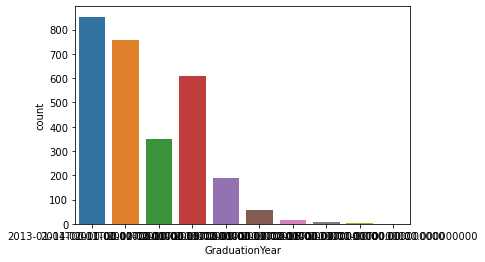

In [45]:
sns.countplot(x = 'GraduationYear', data = salary_data)

- It is evident from the Box plot that Graduation year affects Salary

<AxesSubplot:xlabel='GraduationYear', ylabel='Salary'>

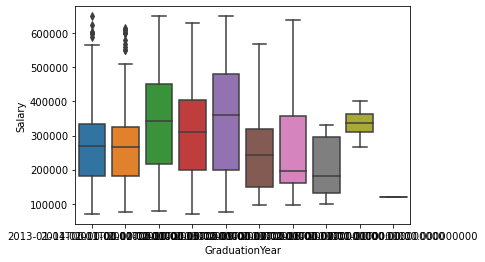

In [46]:
sns.boxplot(x = salary_data['GraduationYear'], y = salary_data['Salary'])

In [47]:
salary_data_org['English'].value_counts().sort_values()
salary_data_org['English'].describe()

count   2998.000
mean     501.066
std      105.305
min      180.000
25%      425.000
50%      500.000
75%      570.000
max      875.000
Name: English, dtype: float64

- According to Box plot values less than 200 and greater than 800 are outliers which counts to 7 rows

<AxesSubplot:ylabel='English'>

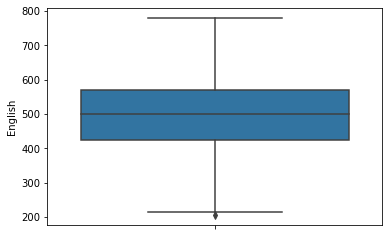

In [48]:
(salary_data['English']<=200).sum() + (salary_data['English']>800).sum()
salary_data = salary_data[(salary_data['English']>204) & (salary_data['English']<=787)]
sns.boxplot(y = salary_data['English'])

<AxesSubplot:xlabel='English', ylabel='Salary'>

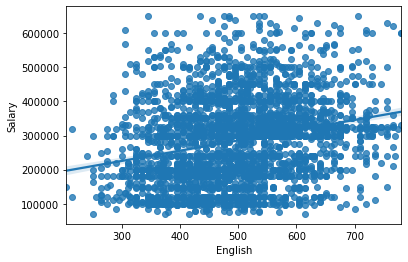

In [49]:
sns.regplot(x = 'English', y = 'Salary', fit_reg = True, scatter = True, data = salary_data)

<AxesSubplot:ylabel='Logical'>

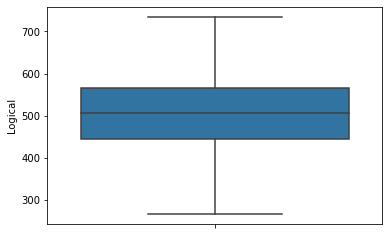

In [50]:
# sns.boxplot(y = salary_data['Logical'])
sum((salary_data['Logical']<=255)) + sum((salary_data['Logical']>=750))
salary_data = salary_data[(salary_data['Logical']>255) & (salary_data['Logical']<750)]
sns.boxplot(y = salary_data['Logical'])

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

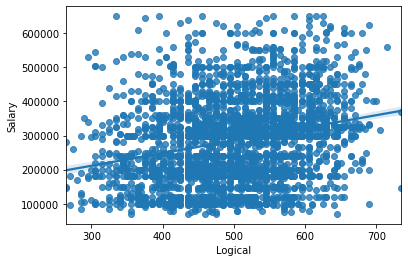

In [51]:
sns.regplot(x = salary_data['Logical'], y = salary_data['Salary'])

<AxesSubplot:ylabel='Quant'>

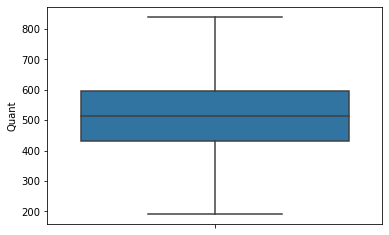

In [52]:
# sns.boxplot(y = salary_data['Quant'])
sum((salary_data['Quant']>850)) + sum((salary_data['Quant']<190))
salary_data = salary_data[(salary_data['Quant']>=190) & (salary_data['Quant']<=850)]
sns.boxplot(y = salary_data['Quant'])

<AxesSubplot:xlabel='Quant', ylabel='Salary'>

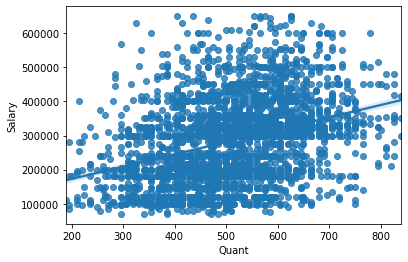

In [53]:
sns.regplot(x = salary_data['Quant'], y = salary_data['Salary'])

/home/pranay/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pranay/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pranay/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:xlabel='Quant', ylabel='Density'>

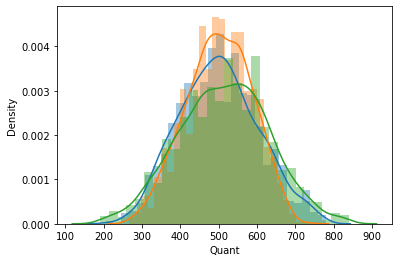

In [54]:
sns.distplot(salary_data['English'])
sns.distplot(salary_data['Logical'])
sns.distplot(salary_data['Quant'])

- Here we can observe that domain marks have considerable effect on Salary, and rows where domain marks are -1, most of the other columns are also -1. So its better to remove these 169 rows.

(2627, 32)

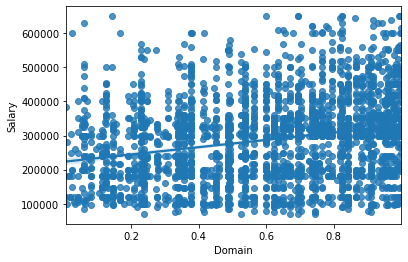

In [55]:
sns.regplot(x = salary_data['Domain'], y = salary_data['Salary'])
salary_data['Domain'].isnull().sum()
salary_data = salary_data.dropna(subset = ['Domain'])
salary_datao = salary_datao.dropna(subset = ['Domain'])
salary_data['Domain'].isnull().sum()
salary_data.shape

- For columns ['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'] there are missing values represented as -1 which denote that student did not opt for that subject and hence did not recieve an score. 
- Thus these types of missing values are intentional and not a result of any error. To incorporate these values for every column i have created a new column with _opt where 1 represents that the student opted for the subject and 0 represents opposite.
- Then i have filled missing values with 0.

In [56]:
na_col = ['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg',
          'TelecomEngg','CivilEngg']
for c in na_col : 
    salary_data[c+'_opt'] = 1
    salary_datao[c+'_opt'] = 1
    salary_data[c+'_opt'] = salary_data[c].notnull().astype(int)
    salary_datao[c+'_opt'] = salary_datao[c].notnull().astype(int)
    salary_data[c] = salary_data[c].fillna(0)
    salary_datao[c] = salary_datao[c].fillna(0)
salary_data.isnull().sum()

Gender                       0
DOB                          0
10percentage                 0
10board                      0
12graduation                 0
12percentage                 0
12board                      0
CollegeTier                  0
Degree                       0
Specialization               0
collegeGPA                   0
CollegeState                 0
GraduationYear               0
English                      0
Logical                      0
Quant                        0
Domain                       0
ComputerProgramming          0
ElectronicsAndSemicon        0
ComputerScience              0
MechanicalEngg               0
ElectricalEngg               0
TelecomEngg                  0
CivilEngg                    0
conscientiousness            0
agreeableness                0
extraversion                 0
nueroticism                  0
openess_to_experience        0
Salary                       0
f                            0
m                            0
Computer

- According to documentation of data, Specialization already contains clean and standardized categorical data

<AxesSubplot:xlabel='Specialization', ylabel='count'>

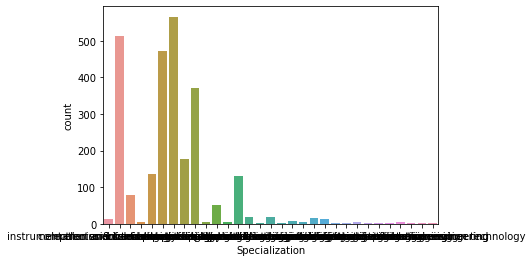

In [57]:
salary_data['Specialization'].value_counts().sort_values()
sns.countplot(x = 'Specialization', data = salary_data)

- It is evident that Specialization has some effect on predicting Salary

(2627, 39)

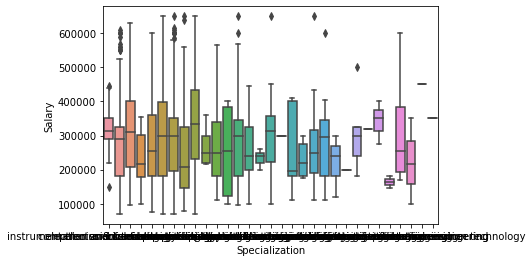

In [58]:
sns.boxplot(x = salary_data['Specialization'], y = salary_data['Salary'])
salary_data.shape

- Columns 10board and 12board have a lot of inconsistencies such as same board has been written in many ways and also with multiple mistakes.
- There is an API called Fuzzy-Wuzzy which calculates the edit distance between data and target word and replaces the words with max matching ratio. But it was replacing other words also in this case, that's why i have not used it completely.
- I have tried to map unique words for different boards which contain these words as substring.

In [59]:
salary_data['10board'] = salary_data['10board'].str.lower()
salary_data['10board'] = salary_data['10board'].str.strip()
salary_datao['10board'] = salary_datao['10board'].str.lower()
salary_datao['10board'] = salary_datao['10board'].str.strip()

salary_data['12board'] = salary_data['12board'].str.lower()
salary_data['12board'] = salary_data['12board'].str.strip()
salary_datao['12board'] = salary_datao['12board'].str.lower()
salary_datao['12board'] = salary_datao['12board'].str.strip()

# salary_data['10board'].unique()
match_map = {
    'andhra pradesh board' : ['andhra pradesh', 'ap', 'andhara pradesh', 'andhpradesh', 'andhra', 'andra'],
    'bihar board' : ['bihar', 'patna'],
    'central board of secondary education' : ['aisse', 'cbse', 'cbsc', 'central board of secondary education', 'all india board'],
    'uttar pradesh board' : ['uttarpradesh', 'up', 'u p','uttar pradesh'],
    'haryana board' : ['harayana', 'hb', 'haryana'],
    'orissa board' : ['orissa', 'odisha', 'hse'],
    'rajasthan board' : ['rajasthan', 'rbse'],
    'gujarat board' : ['gujarat', 'ghseb', 'gseb', 'ghseb', 'gsheb'],
    'kerala board' : ['kerala', 'ksbe', 'kseb', 'kseeb'],
    'delhi board' : ['delhi'],
    'chattisgarh board' : ['cgbse'],
    'himachal pradesh board' : ['himachal'],
    'maharashtra board' : ['maharashtra','hsc','hsce', 'mhsbse', 'msbshse', 'msbte','maharastra'],
    'indian certificate of secondary education' : ['icse'],
    'jammu and kashmir board' : ['j & k', 'j&k', 'jkbose'],
    'jharkhand board' : ['jharkhand', 'jseb'],
    'karnataka board' : ['karnataka', 'karnatak'],
    'madhya pradesh board' : ['madhya pradesh', 'mp'],
    'matriculation board' : ['matriculation', 'metric', 'matric', 'maticulation'],
    'nagpur board' : ['nagpur'],
    'nashik board' : ['nashik'],
    'pune board' : ['pune', 'pseb'],
    'punjab board' : ['punjab'],
    'secondary school certificate' : ['secondary school cerfificate'],
    'secondary school of education' : ['secondary school education'],
    'west bengal board' : ['west bengal', 'wb'],
    'tamil nadu board' : ['tamil', 'tn'],
    'uttrakhand board' : ['uttrakhand', 'uttarakhand'],
    'uttaranchal board' : ['uttaranchal', 'uttranchal'],
    'state board' : ['state', 'staae'],
    'board of secondary education' : ['board of  secondary education', 'board secondary  education', 'bse', 'bseb'],
    'secondary school certificate' : ['ssc', 'ss'], 
    'hyderabad board' : ['hyderabad'],
    'board of intermediate education' : ['intermideate','intermedite','board of secondary school of education','intermediate', 'intermeadiate', 'intermidiate' ,'bice', 'bie', 'biec'],
    'bangalore board' : ['technical education', 'pre-university', 'pre university', 'dpue', 'dte'],
    'dav public school,hehal' : ['dav public school'],
    'indian school certificate examination' : ['council for indian school certificate examination','isc','isc board'],
    'Kentucky Education Assosication' : ['kea'],
    'Upper Arlington Board' : ['ua'],
    'Meghalaya Board' : ['mbose']
}

def fun(row) :
    for key, val in match_map.items() :
#         print(key)
#         print(val)
        for curr in val :
            if curr in row['10board'] :
                row['10board'] = key
            if curr in row['12board'] :
                row['12board'] = key
    return row

salary_data = salary_data.apply(fun, axis = 1)
salary_datao = salary_datao.apply(fun, axis = 1)

max_occ_val = salary_data['10board'].mode()[0]
salary_data['10board'] = salary_data['10board'].replace('0',max_occ_val)
max_occ_val = salary_datao['10board'].mode()[0]
salary_datao['10board'] = salary_datao['10board'].replace('0',max_occ_val)

max_occ_val = salary_data['12board'].mode()[0]
salary_data['12board'] = salary_data['12board'].replace('0',max_occ_val)
max_occ_val = salary_datao['12board'].mode()[0]
salary_datao['12board'] = salary_datao['12board'].replace('0',max_occ_val)

unique_board = salary_data['10board'].unique()
unique_board.sort()
print(unique_board, unique_board.size)

unique_board = salary_data['12board'].unique()
unique_board.sort()
print(unique_board, unique_board.size)

print(salary_data['12board'].value_counts().sort_values())


['Kentucky Education Assosication' 'Upper Arlington Board'
 'andhra pradesh board' 'anglo indian' 'aurangabad board' 'bihar board'
 'board of secondary education' 'central board of secondary education'
 'certificate of middle years program of ib' 'chattisgarh board'
 'dav public school,hehal' 'delhi board' 'gujarat board' 'haryana board'
 'himachal pradesh board' 'indian certificate of secondary education'
 'indian school certificate examination' 'jammu and kashmir board'
 'jawahar navodaya vidyalaya' 'jharkhand board' 'karnataka board'
 'kerala board' 'kiran english medium high school' 'latur board'
 'madhya pradesh board' 'maharashtra board' 'matriculation board'
 'mirza ahmed ali baig' 'nagpur board' 'nashik board'
 'national public school' 'pune board' 'punjab board' 'rajasthan board'
 'sarada high scchool' 'secondary school cerfificate'
 'secondary school certificate' 'secondary school of education'
 'sri kannika parameswari highier secondary school, udumalpet'
 'state board' 'stj

- I have removed rows with board names of 1 count as they are just outliers and reduce accuracy.

In [60]:
df10 = salary_data['10board'].value_counts().sort_values()
df12 = salary_data['12board'].value_counts().sort_values()
df10 = df10[df10 <= 1].index
df12 = df12[df12 <= 1].index
salary_data = salary_data[~salary_data['10board'].isin(df10)]
salary_data = salary_data[~salary_data['12board'].isin(df12)]
salary_datao = salary_datao[~salary_datao['10board'].isin(df10)]
salary_datao = salary_datao[~salary_datao['12board'].isin(df12)]
# (df10[salary_data['10board']]==1).sum()
# (df12[salary_data['12board']]==1).sum()
salary_data['10board'].value_counts().sort_values()
salary_data['12board'].value_counts().sort_values()

salary_data.shape
salary_datao.shape

(2778, 39)

<AxesSubplot:xlabel='10board', ylabel='count'>

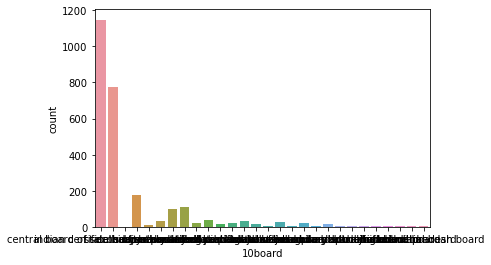

In [61]:
sns.countplot(x = salary_data['10board'])

<AxesSubplot:xlabel='10board', ylabel='Salary'>

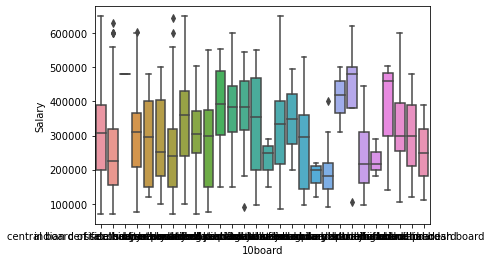

In [62]:
sns.boxplot(x = salary_data['10board'], y = salary_data['Salary'])

<AxesSubplot:xlabel='12board', ylabel='count'>

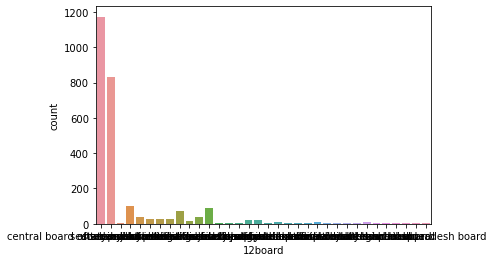

In [63]:
sns.countplot(x = salary_data['12board'])

<AxesSubplot:xlabel='12board', ylabel='Salary'>

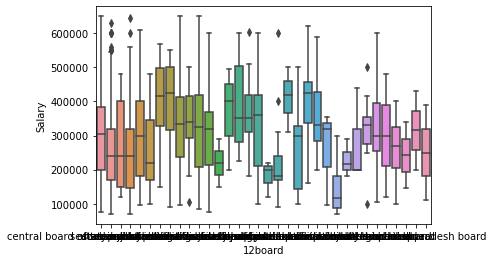

In [64]:
sns.boxplot(x = salary_data['12board'], y = salary_data['Salary'])

In [65]:
categorical_data = ['10board','12board','Degree','CollegeState','Specialization','GraduationYear']

for c in categorical_data :
    salary_data[c+'_num'] = pd.factorize(salary_data[c])[0]+1
    salary_datao[c+'_num'] = pd.factorize(salary_datao[c])[0]+1
salary_data.columns
salary_data.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,f,m,ComputerProgramming_opt,ElectronicsAndSemicon_opt,ComputerScience_opt,MechanicalEngg_opt,ElectricalEngg_opt,TelecomEngg_opt,CivilEngg_opt,10board_num,12board_num,Degree_num,CollegeState_num,Specialization_num,GraduationYear_num
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,f,1990-10-22,87.800,central board of secondary education,2009-01-01,84.000,central board of secondary education,1,B.Tech/B.E.,instrumentation and control engineering,7.382,Delhi,2013-01-01,650,665,810,0.694,485.000,366.000,0.000,0.000,0.000,0.000,0.000,-0.159,0.379,1.240,0.146,0.289,445000,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1
1,m,1990-05-15,57.000,central board of secondary education,2010-01-01,64.500,central board of secondary education,2,B.Tech/B.E.,computer science & engineering,6.500,Uttar Pradesh,2014-01-01,440,435,210,0.342,365.000,0.000,0.000,0.000,0.000,0.000,0.000,1.134,0.046,1.240,0.526,-0.286,110000,0,1,1,0,0,0,0,0,0,1,1,1,2,2,2
3,m,1991-05-04,84.300,central board of secondary education,2009-01-01,86.000,central board of secondary education,1,B.Tech/B.E.,computer science & engineering,8.040,Delhi,2013-01-01,675,620,635,0.990,655.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.446,0.212,0.317,0.273,0.480,420000,0,1,1,0,0,0,0,0,0,1,1,1,1,2,1
4,f,1990-10-30,82.000,central board of secondary education,2008-01-01,75.000,central board of secondary education,2,B.Tech/B.E.,biotechnology,6.430,Tamil Nadu,2012-01-01,575,495,365,0.278,315.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.499,-0.747,-1.070,0.062,0.186,200000,1,0,1,0,0,0,0,0,0,1,1,1,3,3,3
6,f,1989-04-17,72.500,state board,2007-01-01,53.200,state board,2,B.Tech/B.E.,mechanical engineering,6.800,West Bengal,2013-01-01,510,495,405,0.830,0.000,0.000,0.000,469.000,0.000,0.000,0.000,0.128,-0.454,0.317,0.907,-0.094,150000,1,0,0,0,0,1,0,0,0,2,2,1,4,4,1


In [66]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 0 to 2997
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Gender                     2589 non-null   object        
 1   DOB                        2589 non-null   datetime64[ns]
 2   10percentage               2589 non-null   float64       
 3   10board                    2589 non-null   object        
 4   12graduation               2589 non-null   datetime64[ns]
 5   12percentage               2589 non-null   float64       
 6   12board                    2589 non-null   object        
 7   CollegeTier                2589 non-null   int64         
 8   Degree                     2589 non-null   object        
 9   Specialization             2589 non-null   object        
 10  collegeGPA                 2589 non-null   float64       
 11  CollegeState               2589 non-null   object        
 12  Gradua

## Data Modelling

In [67]:
col_to_normalize = ['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience'
                    ,'MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']

ndata_with_out = salary_datao.copy()
ndata_without_out = salary_data.copy()

def normalize_data(row) :
    for c in col_to_normalize :
        row[c] = (row[c]-salary_data[c].mean())/salary_data[c].std()
        return row

ndata_with_out = ndata_with_out.apply(normalize_data,axis = 1)
ndata_without_out = ndata_without_out.apply(normalize_data,axis = 1)

For normalised data without outliers
--------Doing Linear Regression---------
shape of x_train x_test y_train y_test (1812, 35) (777, 35) (1812,) (777,)
Root mean squared error 102564.50470698731
Mean absolute percentage error 37.33014763875342
test score and train score 30.677259277997248 29.428080221587116
      1. Actual  2. Predicted
ID                           
4        200000    230268.748
7        105000    227217.097
8        195000    276951.905
14       325000    409905.469
20       240000    138568.656
...         ...           ...
2986     375000    388252.268
2988     420000    391253.933
2989     300000    269093.552
2994     120000    234228.131
2995     385000    339084.748

[777 rows x 2 columns]
residual analysis
count       777.000
mean       1869.052
std      102613.526
min     -326970.278
25%      -66570.217
50%          80.351
75%       69502.639
max      331268.383
Name: Salary, dtype: float64
--------Doing Random Forest Regression---------
Root mean squared err

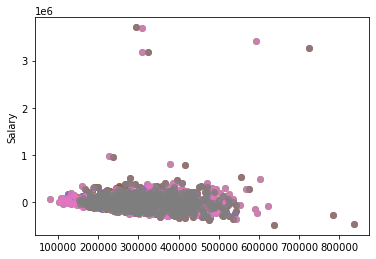

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

def mean_absolute_percentage_error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def train_and_find_accuracy_random(df) :
    print('--------Doing Random Forest Regression---------')
    rf = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_split = 10,
                               min_samples_leaf=4,random_state = 3)
    x1 = df.drop(['Salary'],axis = 'columns', inplace = False)
    y1 = df['Salary']

    X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.3, random_state = 3)
    
    model = rf.fit(X_train,y_train)
    salary_prediction = rf.predict(X_test)
    
    mse = mean_squared_error(y_test,salary_prediction)
    rmse = np.sqrt(mse)
    print('Root mean squared error',rmse)
    print("Mean absolute percentage error",mean_absolute_percentage_error(y_test,salary_prediction))
    
    r2_test = model.score(X_test,y_test)
    r2_train = model.score(X_train,y_train)
    print('test score and train score',r2_test*100,r2_train*100)
    
    print('residual analysis')
    residuals = y_test - salary_prediction
    sns.regplot(x = salary_prediction, y = residuals, scatter = True, fit_reg = False)
    print(residuals.describe())

def train_and_find_accuracy_linear_regression(df) :
    print('--------Doing Linear Regression---------')
    lgr = LinearRegression(fit_intercept = True)
    x1 = df.drop(['Salary'],axis = 'columns', inplace = False)
    y1 = df['Salary']
    
    X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.3, random_state = 3)
    print('shape of x_train x_test y_train y_test',X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        
    model = lgr.fit(X_train, y_train)
    salary_prediction = lgr.predict(X_test)
    
    mse = mean_squared_error(y_test,salary_prediction)
    rmse = np.sqrt(mse)
    print('Root mean squared error',rmse)
    print("Mean absolute percentage error",mean_absolute_percentage_error(y_test,salary_prediction))
        
    r2_test = model.score(X_test,y_test)
    r2_train = model.score(X_train,y_train)
    print('test score and train score',r2_test*100,r2_train*100)
    
    fin = pd.DataFrame({
        "1. Actual" : y_test,
        '2. Predicted' : salary_prediction
    })
    print(fin.sort_index())
    
    print('residual analysis')
    residuals = y_test - salary_prediction
    sns.regplot(x = salary_prediction, y = residuals, scatter = True, fit_reg = False)
    print(residuals.describe())
    
remove_col = ['Gender', 'DOB','10board','12board','Degree', 'Specialization','CollegeState','12graduation','GraduationYear']

salary_data = salary_data.drop(columns = remove_col,axis = 1)
salary_datao = salary_datao.drop(columns = remove_col,axis = 1)
ndata_with_out = ndata_with_out.drop(columns = remove_col,axis = 1)
ndata_without_out = ndata_without_out.drop(columns = remove_col,axis = 1)


print('For normalised data without outliers')
train_and_find_accuracy_linear_regression(ndata_without_out)
train_and_find_accuracy_random(ndata_without_out)
print('For normalised data with outliers')
train_and_find_accuracy_linear_regression(ndata_with_out)
train_and_find_accuracy_random(ndata_with_out)
print('For unnormalised data without outliers')
train_and_find_accuracy_linear_regression(salary_data)
train_and_find_accuracy_random(salary_data)
print('For unnormalised data with outliers')
train_and_find_accuracy_linear_regression(salary_datao)
train_and_find_accuracy_random(salary_datao)

In [69]:
salary_data.columns

Index(['10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary', 'f', 'm', 'ComputerProgramming_opt',
       'ElectronicsAndSemicon_opt', 'ComputerScience_opt',
       'MechanicalEngg_opt', 'ElectricalEngg_opt', 'TelecomEngg_opt',
       'CivilEngg_opt', '10board_num', '12board_num', 'Degree_num',
       'CollegeState_num', 'Specialization_num', 'GraduationYear_num'],
      dtype='object')

In [70]:
abs(ndata_without_out.corr()['Salary']).sort_values(ascending = False)

Salary                      1.000
Quant                       0.352
10percentage                0.286
12percentage                0.283
Logical                     0.257
English                     0.256
Domain                      0.235
collegeGPA                  0.224
GraduationYear_num          0.188
ComputerScience_opt         0.180
ComputerProgramming         0.178
ComputerScience             0.155
CollegeTier                 0.149
agreeableness               0.076
12board_num                 0.069
ComputerProgramming_opt     0.067
Degree_num                  0.061
ElectricalEngg_opt          0.059
nueroticism                 0.059
10board_num                 0.057
ElectricalEngg              0.049
CollegeState_num            0.048
Specialization_num          0.045
conscientiousness           0.042
f                           0.039
m                           0.039
extraversion                0.021
CivilEngg                   0.017
MechanicalEngg_opt          0.017
CivilEngg_opt 

- Until now i have considered all the columns for prediction, Now for testing puposes i will take top columns as per the correlation matrix

For normalised data without outliers
--------Doing Linear Regression---------
shape of x_train x_test y_train y_test (1812, 12) (777, 12) (1812,) (777,)
Root mean squared error 104133.8521771445
Mean absolute percentage error 37.97846200680042
test score and train score 28.539603927386192 26.732348399754912
      1. Actual  2. Predicted
ID                           
4        200000    270633.138
7        105000    231750.409
8        195000    265178.289
14       325000    398198.391
20       240000    145223.467
...         ...           ...
2986     375000    401277.223
2988     420000    386519.426
2989     300000    263808.058
2994     120000    270736.496
2995     385000    314201.843

[777 rows x 2 columns]
residual analysis
count       777.000
mean       2143.207
std      104178.856
min     -317221.787
25%      -67455.039
50%       -3254.016
75%       69525.619
max      375872.496
Name: Salary, dtype: float64
--------Doing Random Forest Regression---------
Root mean squared erro

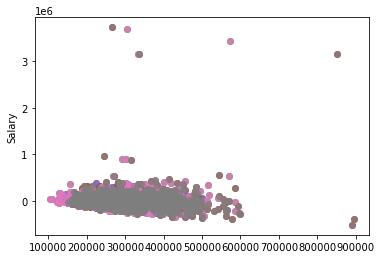

In [71]:
new_features = ['Salary','Quant','10percentage','12percentage','Logical','English','Domain','collegeGPA',
               'GraduationYear_num','ComputerScience_opt','ComputerProgramming','ComputerScience',
                'CollegeTier']

salary_data = salary_data.loc[:,new_features]
salary_datao = salary_datao.loc[:,new_features]
ndata_with_out = ndata_with_out.loc[:,new_features]
ndata_without_out = ndata_without_out.loc[:,new_features]


print('For normalised data without outliers')
train_and_find_accuracy_linear_regression(ndata_without_out)
train_and_find_accuracy_random(ndata_without_out)
print('For normalised data with outliers')
train_and_find_accuracy_linear_regression(ndata_with_out)
train_and_find_accuracy_random(ndata_with_out)
print('For unnormalised data without outliers')
train_and_find_accuracy_linear_regression(salary_data)
train_and_find_accuracy_random(salary_data)
print('For unnormalised data with outliers')
train_and_find_accuracy_linear_regression(salary_datao)
train_and_find_accuracy_random(salary_datao)

## Evaluation and Analysis of outcomes

#### Best Accuracy was 74% achieved for Normalised data without outliers by Random Forest Regression

| Data Type                           | Accuracy(%) | RMSE(Root mean squared error) | MAPE(Mean absolute % error) | Model Used               | Features Used                        |
|-------------------------------------|-------------|-------------------------------|-----------------------------|--------------------------|--------------------------------------|
| Normalised Data without outliers    | 29.4%       | 102564.50                     | 37.33%                      | Linear Regression        | All                                  |
| Normalised Data without outliers    | 74%         | 105499.15                     | 38.28%                      | Random Forest Regression | All                                  |
| Normalised Data with outliers       | 20.71%      | 243161.64                     | 45.60%                      | Linear Regression        | All                                  |
| Normalised Data with outliers       | 60.33%      | 244292.87                     | 47.06%                      | Random Forest Regression | All                                  |
| Un-Normalised Data without outliers | 29.42%      | 102564.50                     | 37.33%                      | Linear Regression        | All                                  |
| Un-Normalised Data without outliers | 73.92%      | 105496.65                     | 38.27%                      | Random Forest Regression | All                                  |
| Un-Normalised Data with outliers    | 20.71%      | 243161.64                     | 45.60%                      | Linear Regression        | All                                  |
| Un-Normalised Data with outliers    | 60.33%      | 244295.18                     | 47.05%                      | Random Forest Regression | All                                  |
|                                     |             |                               |                             |                          |                                      |
| Normalised Data without outliers    | 26.73%      | 104133.85                     | 37.97%                      | Linear Regression        | Top features from Correlation matrix |
| Normalised Data without outliers    | 70.05%      | 106601.65                     | 38.60%                      | Random Forest Regression | Top features from Correlation matrix |
| Normalised Data with outliers       | 18.35%      | 244105.06                     | 45.76%                      | Linear Regression        | Top features from Correlation matrix |
| Normalised Data with outliers       | 56.38%      | 243753.64                     | 47.19%                      | Random Forest Regression | Top features from Correlation matrix |
| Un-Normalised Data without outliers | 26.73%      | 104133.85                     | 37.97%                      | Linear Regression        | Top features from Correlation matrix |
| Un-Normalised Data without outliers | 70.05%      | 106592.63                     | 38.59%                      | Random Forest Regression | Top features from Correlation matrix |
| Un-Normalised Data with outliers    | 18.35%      | 244105.06                     | 45.76%                      | Linear Regression        | Top features from Correlation matrix |
| Un-Normalised Data with outliers    | 56.38       | 243749.88                     | 47.18%                      | Random Forest Regression | Top features from Correlation matrix |

## Use of Project

### This project can be used by candidates and AMCAT team to predict the Annual(CTC) of an Engineering graduate with accuracy of 74%, based on marks in various sections of AMCAT test and personal attributes of candidates such as marks in 10th board, 12th board, college GPA...etc